In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
cardio = pd.read_csv("Downloads/cardio_train.csv",sep=";")

In [5]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Clean Data
**Check the missing value**

In [6]:
cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

id-0%
age-0%
gender-0%
height-0%
weight-0%
ap_hi-0%
ap_lo-0%
cholesterol-0%
gluc-0%
smoke-0%
alco-0%
active-0%
cardio-0%


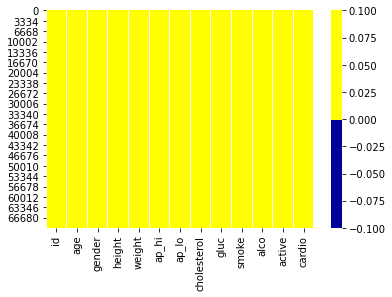

In [7]:
cols = cardio.columns
colours = ['#000099','#ffff00']
sns.heatmap(cardio[cols].isnull(),cmap=sns.color_palette(colours))

for col in cardio.columns:
    pct_missing = np.mean(cardio[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

**Check the data type**

In [8]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
cardio.drop('id', axis='columns', inplace=True)

In [10]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Upper the first letter of columns name**

In [11]:
cardio.columns = cardio.columns.str.capitalize()

In [12]:
cardio.head()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Check the duplicate value**

In [13]:
duplicate = cardio[cardio.duplicated()]

In [14]:
duplicate.count()

Age            24
Gender         24
Height         24
Weight         24
Ap_hi          24
Ap_lo          24
Cholesterol    24
Gluc           24
Smoke          24
Alco           24
Active         24
Cardio         24
dtype: int64

**Drop duplicate values**

In [15]:
cardio.drop_duplicates(inplace = True)

In [16]:
duplicates = cardio[cardio.duplicated()]

In [17]:
duplicates.count()

Age            0
Gender         0
Height         0
Weight         0
Ap_hi          0
Ap_lo          0
Cholesterol    0
Gluc           0
Smoke          0
Alco           0
Active         0
Cardio         0
dtype: int64

**Detecting Outliers**

In [18]:
cardio.describe()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

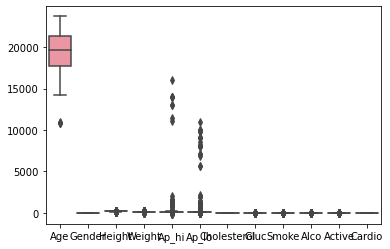

In [19]:
sns.boxplot(data=cardio)

We found that Age,Ap_hi,Ap_lo may have outliers.\
**Double check outliers of three variables**

In [20]:
list = ['Age','Ap_hi','Ap_lo']

In [21]:
def standartization(cardio):
    cardio_std = cardio.copy(deep=True)
    for column in list:
        cardio_std[column] = (cardio_std[column]-cardio_std[column].mean())/cardio_std[column].std()
    return cardio_std

Based on the distribution of data where mean is 0 and standard deviation is 1.

In [22]:
cardio_std = standartization(cardio)

In [23]:
cardio_std.head()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,-0.436071,2,168,62.0,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,156,85.0,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,165,64.0,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,169,82.0,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,156,56.0,-0.187100,-0.194352,1,1,0,0,0,0


In [24]:
cardio_melted = pd.melt(frame=cardio_std,id_vars='Cardio',value_vars=list,var_name='features',value_name='value',col_level=None)

In [25]:
cardio_melted

,Cardio,features,value
0,0,Age,-0.436071
1,1,Age,0.307635
2,1,Age,-0.248017
3,1,Age,-0.748143
4,0,Age,-0.808532
...,...,...,...
209923,0,Ap_lo,-0.088254
209924,1,Ap_lo,-0.035205
209925,1,Ap_lo,-0.035205
209926,1,Ap_lo,-0.088254


<AxesSubplot:xlabel='features', ylabel='value'>

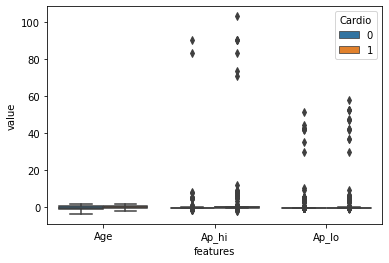

In [26]:
sns.boxplot(x='features', y='value', hue='Cardio',data=cardio_melted)

Obviously find that Ap_hi and Ap_lo have obvious outliers.\
**Check and deal with the outliers**

In [27]:
Ap_list = ['Ap_hi','Ap_lo']

In [28]:
range = pd.DataFrame(index=['lower','upper'])

In [29]:
for each in Ap_list:
    mean = np.mean(cardio[each])
    std = np.std(cardio[each])
    lower_range=mean-2*std
    upper_range=mean+2*std
    range[each]=[lower_range,upper_range]

In [30]:
range

,Ap_hi,Ap_lo
lower,-179.252804,-280.370206
upper,436.893710,473.642728


In [31]:
Ap_hi_filter = (cardio['Ap_hi'] > range['Ap_hi'][1])

In [32]:
Ap_lo_filter = (cardio['Ap_lo'] > range['Ap_lo'][1])

In [33]:
Outlier_filter = (Ap_hi_filter | Ap_lo_filter)

In [34]:
cardio_outliers= cardio[Outlier_filter]

In [35]:
cardio_outliers['Cardio'].value_counts()

1    828
0    163
Name: Cardio, dtype: int64

In [36]:
print("There is {} outliers".format(cardio[Outlier_filter]["Cardio"].count()))

There is 991 outliers


The number of outliers accounts for the total is 1.4162%.\
**Remove outliers**

In [37]:
cardio = cardio[~Outlier_filter]

### EDA

In [38]:
corr = cardio.corr()

<AxesSubplot:>

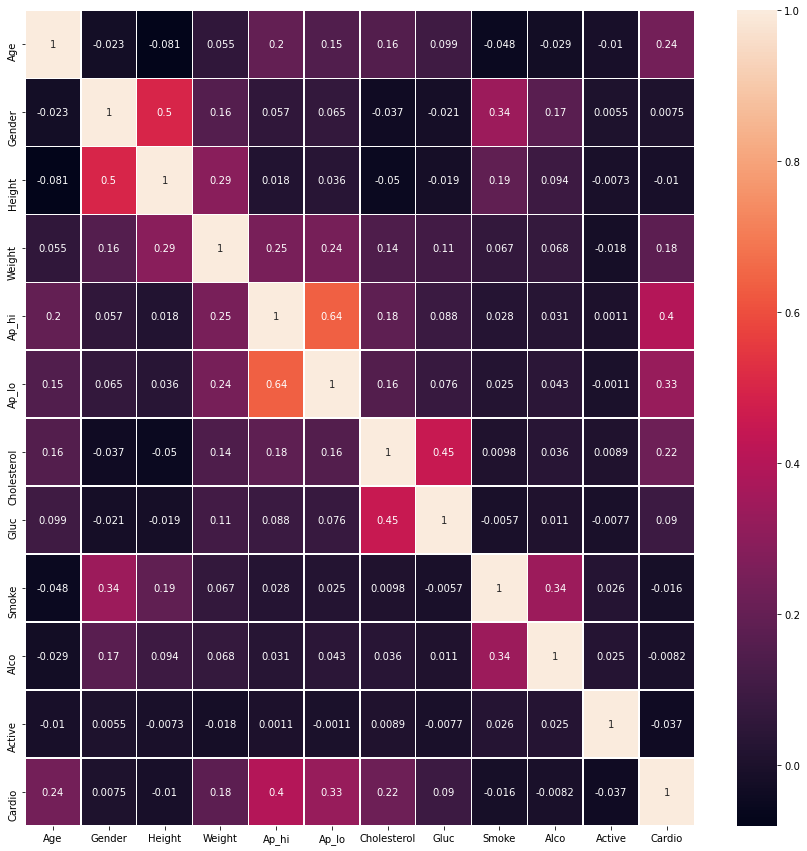

In [39]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=0.5,ax=ax)

In [67]:
cardio['Cardio'].value_counts()

0    34841
1    34144
Name: Cardio, dtype: int64

<AxesSubplot:xlabel='Cardio', ylabel='count'>

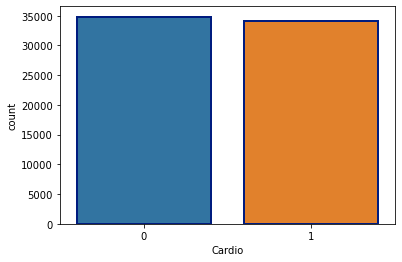

In [68]:
sns.countplot(x='Cardio',data=cardio,linewidth=2,edgecolor=sns.color_palette("dark", 1))

Text(0.5, 1.0, 'Active')

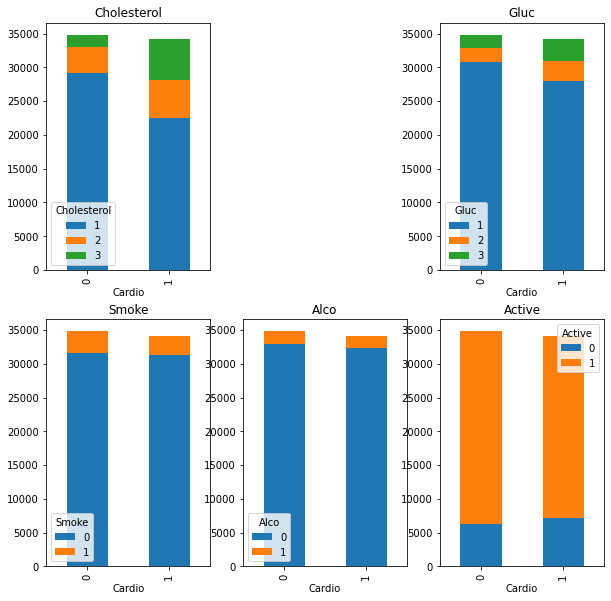

In [108]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
cardio.groupby(['Cardio','Cholesterol']).size().unstack().plot(kind='bar',stacked=True,ax=ax1)
ax1.set_title('Cholesterol')
cardio.groupby(['Cardio','Gluc']).size().unstack().plot(kind='bar',stacked=True,ax=ax2)
ax2.set_title('Gluc')
cardio.groupby(['Cardio','Smoke']).size().unstack().plot(kind='bar',stacked=True,ax=ax3)
ax3.set_title('Smoke')
cardio.groupby(['Cardio','Alco']).size().unstack().plot(kind='bar',stacked=True,ax=ax4)
ax4.set_title('Alco')
cardio.groupby(['Cardio','Active']).size().unstack().plot(kind='bar',stacked=True,ax=ax5)
ax5.set_title('Active')

<AxesSubplot:xlabel='Gender', ylabel='count'>

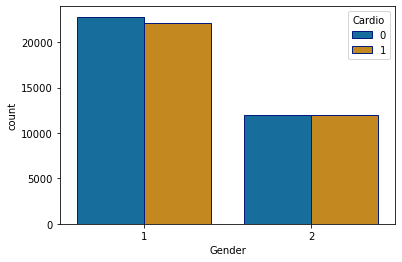

In [94]:
sns.countplot(x='Gender', hue='Cardio', data= cardio, palette='colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

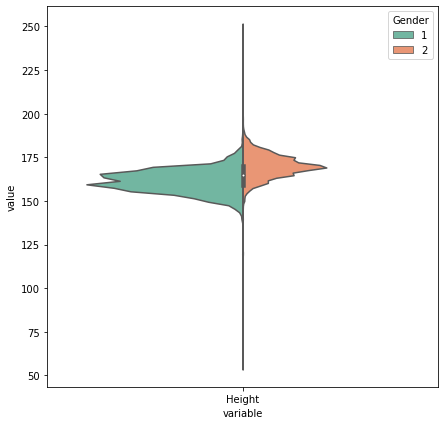

In [43]:
df_melt = pd.melt(frame=cardio, value_vars=['Height'], id_vars=['Gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

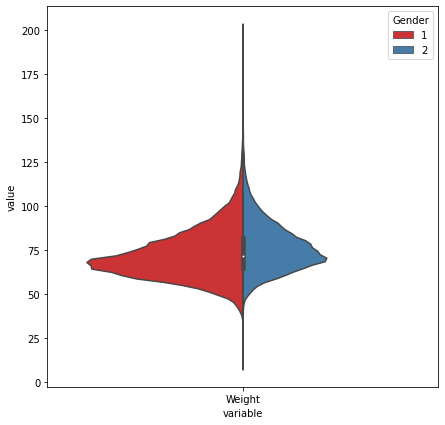

In [44]:
df_melt = pd.melt(frame=cardio, value_vars=['Weight'], id_vars=['Gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

**Change the age from days to years**

In [59]:
cardio['age']=(cardio['Age']/365).round(0)

In [62]:
cardio['age']=pd.to_numeric(cardio['age'],downcast='integer')

<AxesSubplot:xlabel='age', ylabel='count'>

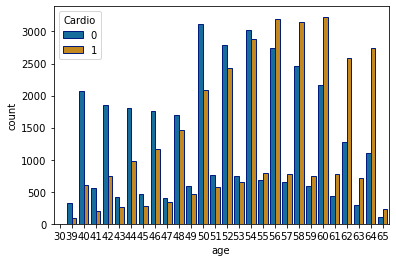

In [65]:
sns.countplot(x='age',hue="Cardio",data= cardio, palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))